<a href="https://colab.research.google.com/github/Nischay-verma/house_price_prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bangalore house price prediction

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
path = "https://raw.githubusercontent.com/Nischay-verma/house_price_prediction/main/Bengaluru_House_Data.csv"
df = pd.read_csv(path)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info

<bound method DataFrame.info of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


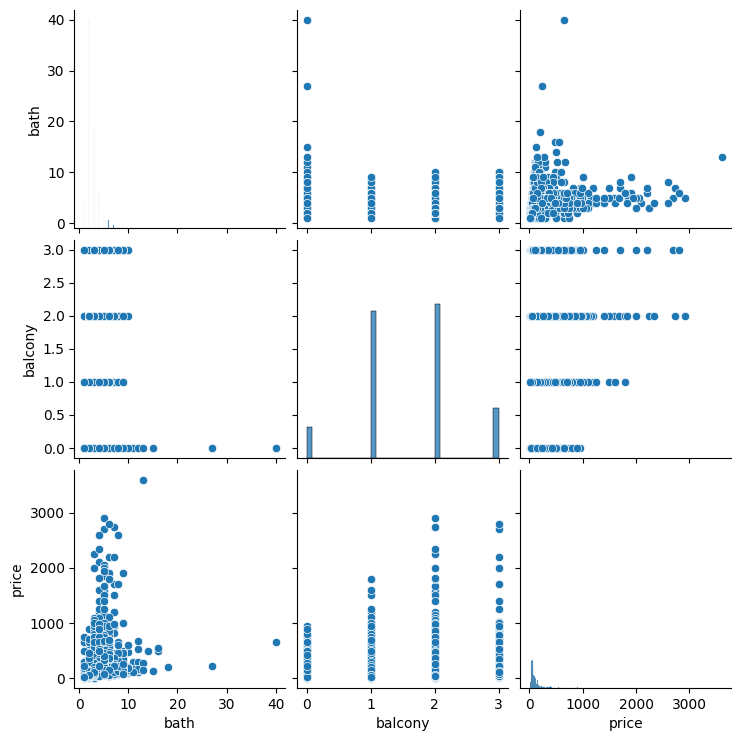

In [6]:
sns.pairplot(df)

## Data Cleaning

In [7]:
def value_count(df):
  for i in df.columns:
    print(df[i].value_counts())
    print("////////////////////////////")
 
value_count(df)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
////////////////////////////
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
////////////////////////////
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
////////////////////////////
2 BHK   

## Drop unnecessary feature

In [8]:
df=df.drop(["area_type","society","balcony","availability"],axis="columns")

In [9]:
df["location"].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

## Handle the missing value

In [10]:
df["location"] = df["location"].fillna("Whitefield")

In [11]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def convertRange(x):

  temp = x.split('-')
  if len(temp) == 2:
    return(float(temp[0]) + float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [13]:
df["total_sqft"] = df["total_sqft"].apply(convertRange)


In [14]:
df["total_sqft"] = df["total_sqft"].fillna(df["total_sqft"].mean())

In [15]:
df["size"].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [16]:
df["size"] = df["size"].fillna('2 bhk')

In [17]:
df["bhk"] = df["size"].str.split().str.get(0).astype(int)

In [18]:
df["location"].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [19]:
df["location"] = df["location"].apply(lambda x: x.strip())
location_count = df["location"].value_counts()

In [20]:
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [21]:
df["location"] = df["location"].apply(lambda x: 'other' if x in location_count_less_10 else x)

## Adding New Feature price_per_sqft

In [22]:
df["price_per_sqft"] = df["price"] * 100000 / df["total_sqft"]
df["price_per_sqft"]

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [23]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## Detect & Drop Outliers

In [24]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13320.000000,13247.000000,13320.000000,13320.000000,1.332000e+04
mean,1559.626694,2.692610,112.565627,2.802778,7.912273e+03
std,1236.264860,1.341458,148.971674,1.294496,1.062465e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266667e+03
50%,1279.500000,2.000000,72.000000,3.000000,5.438331e+03
75%,1678.000000,3.000000,120.000000,3.000000,7.325026e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [25]:
#Identifying Outliers
(df["total_sqft"]/ df["bhk"]).describe()

count    13320.000000
mean       575.574751
std        388.520811
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [26]:
df = df[((df["total_sqft"]/ df["bhk"]) >= 350)]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12218.000000,12145.000000,12218.000000,12218.000000,12218.000000
mean,1606.984468,2.538411,110.851550,2.620151,6185.344516
std,1272.782268,1.052255,153.074795,0.944915,4020.134798
min,350.000000,1.000000,8.440000,1.000000,267.829813
25%,1124.000000,2.000000,49.000000,2.000000,4200.000000
50%,1310.000000,2.000000,69.500000,3.000000,5263.157895
75%,1710.000000,3.000000,115.000000,3.000000,6807.585028
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [27]:
# Removing price_per_sqft outliers
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, sub_df in df.groupby('location'):
    m=np.mean(sub_df.price_per_sqft)
    st=np.std(sub_df.price_per_sqft)
    reduced_df = sub_df[(sub_df.price_per_sqft > (m-st)) & (sub_df.price_per_sqft <= (m + st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out
 
df = remove_pps_outliers(df)
df.shape

(9940, 7)

In [28]:
# Removing BHK outliers
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
          }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')
 
df = remove_bhk_outliers(df)
df.shape

(7086, 7)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

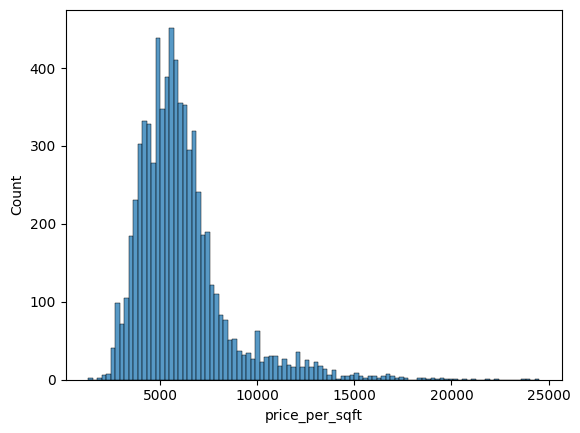

In [29]:
sns.histplot(df["price_per_sqft"])

Text(0, 0.5, 'Count')

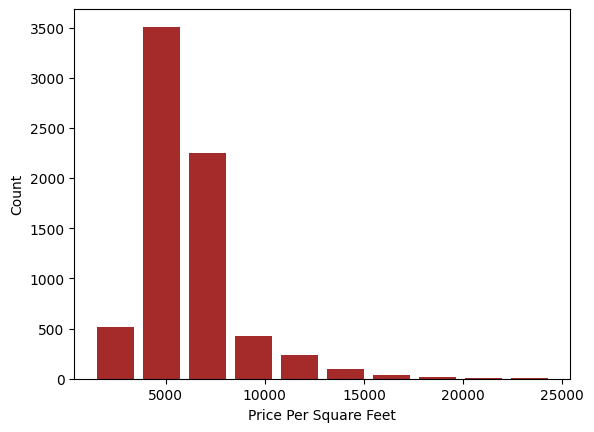

In [30]:
plt.hist(df.price_per_sqft,rwidth=0.8, color = "brown")
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [31]:
df = df.drop(["size", "price_per_sqft"], axis= 'columns')
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [32]:
df.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6., nan,  7.,  9., 12., 16., 13.])

In [33]:
df[df.bath > df.bhk+2]
 
# here we are considering data only total no. bathroom =  bhk + 1
df = df[df.bath < df.bhk+2]
df.shape

(6975, 5)

In [34]:
df.to_csv('Clean_df.csv', index= False)

# Handling Categorical Value


In [35]:
df = pd.get_dummies(df, drop_first=True, columns=['location'])
df.shape

(6975, 245)

## Assigning X and y


In [36]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Applying ML Models

# Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_train= scaler.transform(X)


# split the dataset

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (5580, 244)
Shape of X_test (1395, 244)
Shape of y_train (5580,)
Shape of y_test (1395,)


## Importing Regression Models

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

## Apply Linear Regression

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_linear = r2_score(y_test, y_pred_lr)
print("R2 score of Linear Regression:", r2_linear*100)


R2 score of Linear Regression: 98.89009279613941


## Applying Lasso

In [41]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("R2 score of Lasso Regression:", r2_lasso*100)


R2 score of Lasso Regression: 3.086210736406525


# Applying Ridge

In [42]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 score of Ridge Regression:", r2_ridge*100)



R2 score of Ridge Regression: 91.72905789742578


# Applying Random Forest

In [43]:
Reg_RF = RandomForestRegressor()
Reg_RF.fit(X_train, y_train)
y_pred_Reg_RF = Reg_RF.predict(X_test)
r2_RF = r2_score(y_test, y_pred_Reg_RF)
print("R2 score of RandomForestRegressor:", r2_RF*100)

R2 score of RandomForestRegressor: 17.66749232720517


## Applying SVR

In [44]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
r2_svr = r2_score(y_test, y_pred_svr)
print("R2 score of SVR :", r2_svr*100)

R2 score of SVR : -2.528144464473714


# FuturePrediction

In [45]:
X.columns

Index(['total_sqft', 'bath', 'price', 'bhk', 'location_1st Phase JP Nagar',
       'location_2nd Phase Judicial Layout', 'location_2nd Stage Nagarbhavi',
       'location_5th Block Hbr Layout', 'location_5th Phase JP Nagar',
       'location_6th Phase JP Nagar',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=244)

## Saving ML model (Linear Regression)

In [46]:
import joblib
joblib.dump(lr, "house_price_prediction_model1.pkl")
     

['house_price_prediction_model1.pkl']

## Load MI model

In [47]:
model = joblib.load('house_price_prediction_model1.pkl')

After loading the model we need to deploy the model to predict the price based on future data to give prediction